# Challenge 2

In this lab you will partner with another student to conduct **[pair programming](https://en.wikipedia.org/wiki/Pair_programming)**. In the next 60 minutes there will be 2 coding sessions of 30 minutes each. In each sessoin, one student will be the **driver** to write the code to solve the problem while the other student will be the **observer** to watch and review. There will be several iterations of your code because the observer will help the driver review the codes and make improvements until the 15 minute session ends. After the coding session ends, the driver and observer will switch roles.

#### Import all the libraries that are necessary

In [23]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline

## Preparation

#### Import the `Fitbit2.csv` file and name your dataset `fitbit`

In [2]:
fitbit=pd.read_csv('Fitbit2.csv')

fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


## Coding Session I - 30 minutes

From the Fitbit data, we want to visually understand: 

1. **How the average number of steps change by month. Use the appropriate visualization to show the median steps by month?**
1. **Is Fitbitter more active on weekend or workdays?**

##### All plots must be in the same jupyter notebook cell.

Hints:

- Use `Months_encoded` and `Week_or Weekend` columns
- Use `matplolib.pyplot` object oriented API
- Set your size figure to `12,4`
- Explore `plt.sca`
- Explore `plt.xticks`
- Save your figures

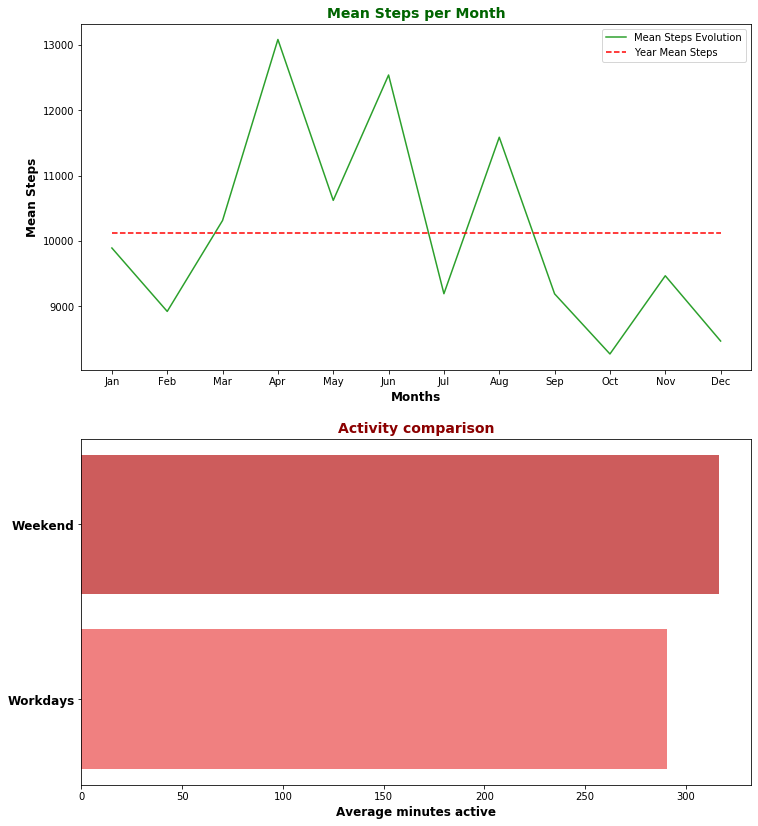

In [105]:
# Driver 1 enter codes here
## OPERACIONES PARA EL 'MEAN STEPS PER MONTH' PLOT
def avg_steps_month(months):
    return {month:fitbit[fitbit['Months_encoded'] == month]['Steps'].mean() for month in months}
    
months = np.sort(fitbit['Months_encoded'].unique())
steps_month_dict = avg_steps_month(months)
steps_month_df = pd.DataFrame.from_dict(steps_month_dict, orient='index', columns=['mean_steps']).reset_index()
steps_month_df['index'] = steps_month_df['index'].apply(lambda x: calendar.month_abbr[x]) 
## Sé lo que hace xticks, pero en este caso me va mejor pasar los meses de número a nombre en el dataframe, así lo ploteo directamente

## OPERACIONES PARA EL 'ACTIVITY COMPARISON' PLOT
mean_weekd = fitbit[fitbit['Work_or_Weekend'] == True].iloc[:,6:9].sum(axis=1).mean()
mean_weekn = fitbit[fitbit['Work_or_Weekend'] == False].iloc[:,6:9].sum(axis=1).mean()

## PLOTS
fig, ax = plt.subplots(2, 1, figsize=(12,14))

plt.sca(ax[0])
plt.plot(steps_month_df['index'], steps_month_df['mean_steps'], color='tab:green', label='Mean Steps Evolution')
plt.plot(steps_month_df['index'], [steps_month_df['mean_steps'].mean()]*12, color='r', linestyle='--', label='Year Mean Steps')
ax[0].set_title('Mean Steps per Month', fontsize=14, fontweight='bold', c='darkgreen')
ax[0].set_xlabel('Months', fontweight='bold', fontsize=12)
ax[0].set_ylabel('Mean Steps', fontweight='bold', fontsize=12)
plt.legend(loc='upper right')

plt.sca(ax[1])
plt.barh(['Workdays', 'Weekend'], [mean_weekd, mean_weekn], color=['lightcoral', 'indianred'])
ax[1].set_title('Activity comparison', fontsize=14, fontweight='bold', c='darkred')
ax[1].set_xlabel('Average minutes active', fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)

plt.savefig("activity_1.png")

## Coding Session II - 30 minutes

**Write a loop to plot 3 scatter plots of the following features:**

1. **`Minutes Lightly Active`  vs `Steps`**
1. **`Minutes Very Active` vs `Steps`**
1. **`Minutes Sedentary` vs `Steps`**

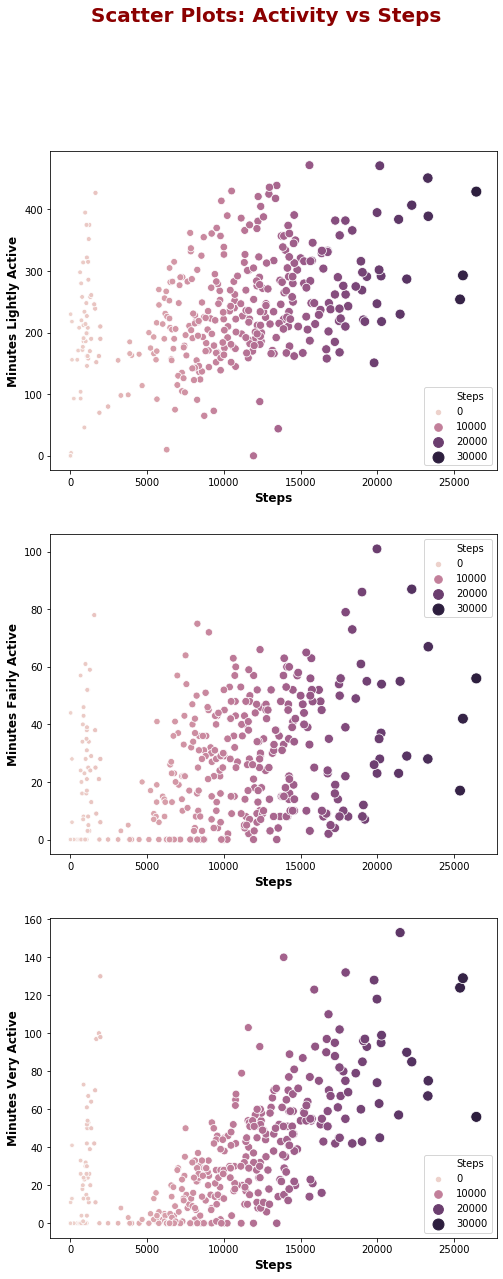

In [159]:
# Driver 2 enter codes here
selected_df = pd.concat([fitbit.iloc[:,6:9], fitbit['Steps']], axis=1)
columns = list(selected_df.iloc[:,:-1])

f, ax = plt.subplots(3,1, figsize=(8, 20))
f.suptitle('Scatter Plots: Activity vs Steps', fontsize=20, fontweight='bold', c='darkred')

for column in columns:
    plt.sca(ax[columns.index(column)])
    scpl = sns.scatterplot(data=selected_df, x='Steps', y=column, hue='Steps', size='Steps', sizes=(20, 120))
    scpl.set_ylabel(column, fontweight='bold', fontsize=12)
    scpl.set_xlabel('Steps', fontweight='bold', fontsize=12)

plt.savefig("activity_2.png")